In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/gathering_affinities.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [3]:
donor_dictionary = {}
for f in os.listdir('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/raw/'):
    donor = f.split('_')[0]
    alleles = [x[:4]+'_'+x[4:] for x in f.split('.')[0].split('_')[1:]]
    donor_dictionary[donor] = alleles

In [4]:
donor_dictionary.keys()

['DonorB', 'DonorC', 'DonorA', 'DonorF', 'DonorG', 'DonorD', 'DonorE']

In [9]:
MS_PHBR = []
for donor in donor_dictionary.keys():
    MS_PHBR.extend(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.random.only_15.csv'.format('DonorB'), index_col=0)['PHBR'].dropna())

In [10]:
len(MS_PHBR)

7000

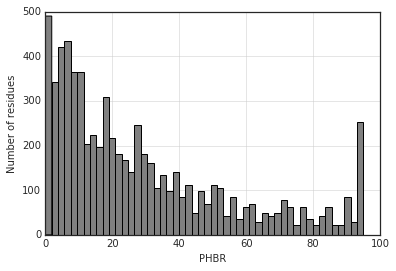

In [17]:
pd.Series(MS_PHBR).hist(bins=50, color='grey')
plt.xlabel('PHBR')
plt.ylabel('Number of residues')